# 1. For the question in last week's lab, is the search direction a gradient descent one? Comment on that.


# 2.Using steepest gradient descent, find all the local minima for the function  J(x1, x2) = (x1^2+x2−11)^2+(x1+x2^2−7)^2. 
While applying gradient descent, do the following (a) Fixing the value for alpha (b) use line search to determine the value for alpha. Plot the intermediate steps in the iteration to show one of the minimal point. 

The optimal point is [3.00000001 2.00000228]
The iteration points are
[[0.         0.        ]
 [1.78212891 2.80048828]
 [2.99977673 2.02925108]
 [2.99053347 2.012867  ]
 [2.99992463 2.00749366]
 [2.99756957 2.0033411 ]
 [2.99998258 2.00194591]
 [2.99936878 2.00087112]
 [2.99999629 2.00050649]
 [2.99983556 2.00022676]
 [2.99999917 2.00013197]
 [2.99995725 2.00005928]
 [2.99999984 2.00003429]
 [2.99998892 2.00001544]
 [3.         2.00000887]
 [2.99999714 2.00000401]
 [3.00000001 2.00000228]]


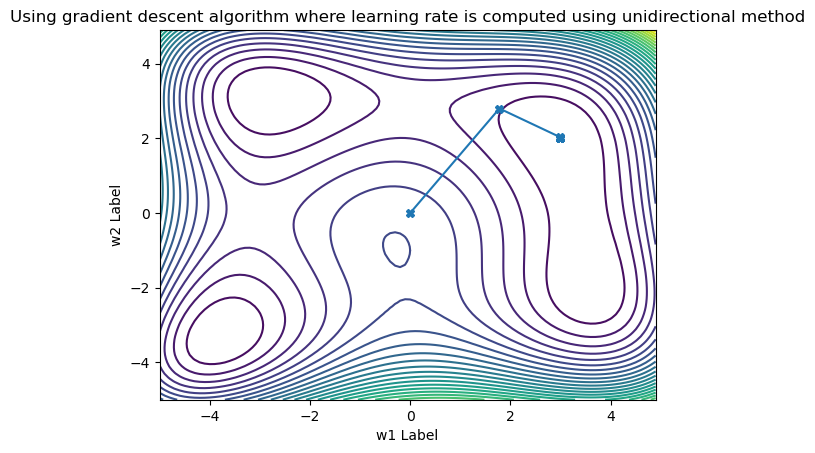

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

def grad_J(w):   # calculating gradient of the function at a point.
    length = np.size(w)
    grad = np.zeros(length)
    
    grad[0] = (4*(w[0]**3)) - (42* w[0]) + (4*w[0]*w[1]) + (2 * (w[1]**2)) - 14
    grad[1] = (2*(w[0]**2)) + (4*w[0]*w[1]) - (26 * w[1]) + (4 * (w[1]**3)) - 22
    
    return grad

def phi(w):
    val = ((w[0]**2) + w[1] - 11)**2 + (w[0] + (w[1]**2) - 7)**2
    return val


def bracketing_method_alpha(w_start, direction, a, b, n):
    d_alpha = (b - a)/n
    w1 = a
    w2 = w1 + d_alpha
    w3 = w2 + d_alpha
    while(w3 <= b):
        x = w_start + w1*direction
        y = w_start + w2*direction
        z = w_start + w3*direction
        if((phi(x) >= phi(y)) and (phi(y) <= phi(z))):
            return w1, w3
        else:
            w1 = w2
            w2 = w3
            w3 = w3 + d_alpha
    if(phi(w_start + a*direction) > phi(w_start + b*direction)):
        return (b - d_alpha), b
    else:
        return a, (a + d_alpha)

def Region_elimination_alpha(w_start, direction, a, b):
    L = b - a
    eps = 10e-5
    w_m = (a+b)/2
    while(L > eps):
        w_1 = a + L/4
        w_2 = b - L/4
        x = w_start + w_1*direction
        y = w_start + w_m*direction
        z = w_start + w_2*direction
        if(phi(x) < phi(y)):
            b = w_m
            w_m = w_1
        elif(phi(z) < phi(y)):
            a = w_m
            w_m = w_2
        else:
            a = w_1
            b = w_2   
        L = b - a
    return a
        

def Unidirectional(w_start , direction, n):
    alpha_1 = 0
    alpha_2 = 5
    interval = bracketing_method_alpha(w_start, direction, alpha_1, alpha_2, n)
    
    pt = Region_elimination_alpha(w_start, direction, interval[0], interval[1])
    return pt
    
def Gradient_descent(st_point):    # Using unidirectional method to find learning rate.
    w = st_point
    grad = grad_J(w)
    eps = 10e-5
    iterates = []
    iterates.append(list(w))
    
    while(pow(np.dot(grad, grad), 0.5) > eps):
        direction = - grad
        alpha = Unidirectional(w, direction, 50)
        w = w - alpha*grad
        iterates.append(list(w))
        grad = grad_J(w)
        
    iterates = np.array(iterates)    
    return w, iterates

def Gradient_descent_alpha(st_point):   # for fixed learning rate i.e. alpha.
    w = st_point
    grad = grad_J(w)
    eps = 10e-5
    iterates = []
    iterates.append(list(w))
    
    while(pow(np.dot(grad, grad), 0.5) > eps):
        direction = - grad
        alpha = 0.01
        w = w - alpha*grad
        iterates.append(list(w))
        grad = grad_J(w)
        
    iterates = np.array(iterates)    
    return w, iterates


starting_point = np.array([0, 0])
optimal_point , iteration_point = Gradient_descent(starting_point)
print(f'The optimal point is {optimal_point}')
print('The iteration points are')
print(iteration_point)


w1 = np.arange(-5, 5, 0.1)
w2 = np.arange(-5, 5, 0.1)
W1, W2 = np.meshgrid(w1, w2)  #Forming MeshGrid

J = ((W1**2) + W2 - 11)**2 + (W1 + (W2**2) - 7)**2

fig, ax = plt.subplots(1, 1) 
ax.contour(W1, W2, J, 30)
ax.plot(iteration_point[:, 0], iteration_point[:, 1], "X-")
ax.set_xlabel('w1 Label')
ax.set_ylabel('w2 Label')
ax.set_title('Using gradient descent algorithm where learning rate is computed using unidirectional method')
plt.show()

The optimal point is [2.99999889 2.00000268]
The iteration points are:
[[0.         0.        ]
 [0.14       0.22      ]
 [0.33649024 0.49515008]
 [0.60472417 0.83010415]
 [0.9560018  1.21565795]
 [1.38653012 1.61510223]
 [1.86050388 1.95848065]
 [2.30184867 2.17222411]
 [2.62639423 2.24103641]
 [2.80893203 2.22011185]
 [2.89414973 2.17238515]
 [2.93415135 2.12811314]
 [2.95571635 2.09395191]
 [2.96898325 2.06884055]
 [2.97781302 2.05055386]
 [2.98393759 2.03721943]
 [2.98828338 2.02746153]
 [2.9914098  2.02029624]
 [2.9936795  2.01501985]
 [2.99533761 2.01112592]
 [2.99655437 2.00824746]
 [2.99745015 2.006117  ]
 [2.99811117 2.0045387 ]
 [2.99859981 2.00336863]
 [2.99896148 2.00250076]
 [2.99922942 2.00185678]
 [2.99942807 2.00137881]
 [2.99957541 2.00102397]
 [2.99968474 2.0007605 ]
 [2.9997659  2.00056485]
 [2.99982614 2.00041955]
 [2.99987088 2.00031163]
 [2.99990409 2.00023148]
 [2.99992876 2.00017195]
 [2.99994709 2.00012773]
 [2.9999607  2.00009488]
 [2.99997081 2.00007048]
 [2.

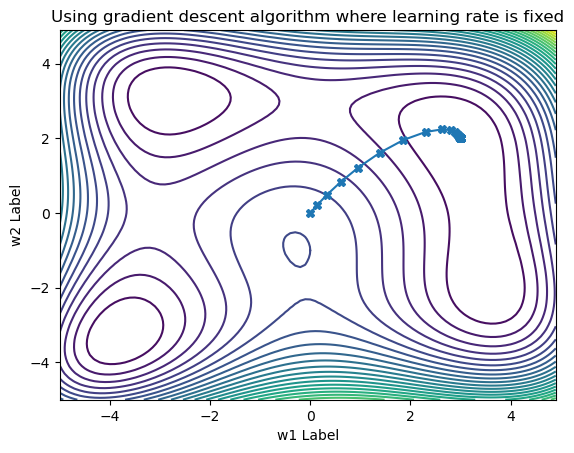

In [2]:
starting_point = np.array([0, 0])
optimal_point , iteration_point = Gradient_descent_alpha(starting_point)
print(f'The optimal point is {optimal_point}')
print('The iteration points are:')
print(iteration_point)


w1 = np.arange(-5, 5, 0.1)
w2 = np.arange(-5, 5, 0.1)
W1, W2 = np.meshgrid(w1, w2)  #Forming MeshGrid

J = ((W1**2) + W2 - 11)**2 + (W1 + (W2**2) - 7)**2

fig, ax = plt.subplots(1, 1) 
ax.contour(W1, W2, J, 30)
ax.plot(iteration_point[:, 0], iteration_point[:, 1], "X-")
ax.set_xlabel('w1 Label')
ax.set_ylabel('w2 Label')
ax.set_title('Using gradient descent algorithm where learning rate is fixed')
plt.show()

The optimal point is [-3.77930985 -3.28318574]
The iteration points are:
[[-5.         -5.        ]
 [-3.87207031 -3.22753906]
 [-3.7792022  -3.28141842]
 [-3.77884096 -3.28289555]
 [-3.77930037 -3.28301813]
 [-3.77926563 -3.28315861]
 [-3.77930939 -3.28317006]
 [-3.77930603 -3.28318335]
 [-3.77931018 -3.28318448]
 [-3.77930985 -3.28318574]]


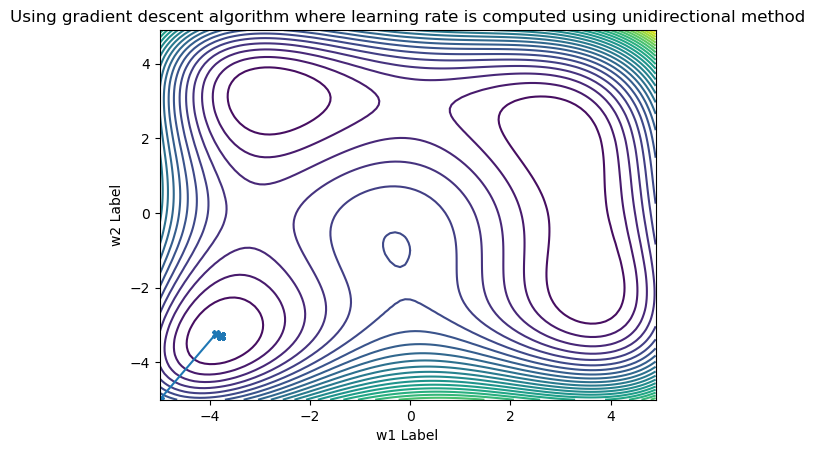

In [3]:
starting_point = np.array([-5, -5])
optimal_point , iteration_point = Gradient_descent(starting_point)
print(f'The optimal point is {optimal_point}')
print('The iteration points are:')
print(iteration_point)

w1 = np.arange(-5, 5, 0.1)
w2 = np.arange(-5, 5, 0.1)
W1, W2 = np.meshgrid(w1, w2)  #Forming MeshGrid

J = ((W1**2) + W2 - 11)**2 + (W1 + (W2**2) - 7)**2

fig, ax = plt.subplots(1, 1) 
ax.contour(W1, W2, J, 30)
ax.plot(iteration_point[:, 0], iteration_point[:, 1], "X-")
ax.set_xlabel('w1 Label')
ax.set_ylabel('w2 Label')
ax.set_title('Using gradient descent algorithm where learning rate is computed using unidirectional method')
plt.show()

The optimal point is [-3.7793098  -3.28318526]
The iteration points are:
[[-5.         -5.        ]
 [-3.46       -2.58      ]
 [-3.60653056 -2.94036352]
 [-3.70195382 -3.15231526]
 [-3.75297385 -3.23980168]
 [-3.77110745 -3.26996286]
 [-3.77688629 -3.27924982]
 [-3.77859058 -3.28203251]
 [-3.77910128 -3.28284649]
 [-3.77924832 -3.28308697]
 [-3.77929235 -3.28315684]
 [-3.77930493 -3.2831775 ]
 [-3.77930872 -3.28318349]
 [-3.7793098  -3.28318526]]


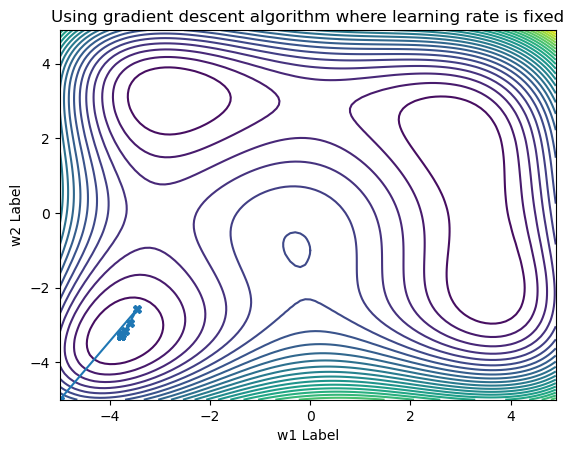

In [4]:
starting_point = np.array([-5, -5])
optimal_point , iteration_point = Gradient_descent_alpha(starting_point)
print(f'The optimal point is {optimal_point}')
print('The iteration points are:')
print(iteration_point)

w1 = np.arange(-5, 5, 0.1)
w2 = np.arange(-5, 5, 0.1)
W1, W2 = np.meshgrid(w1, w2)  #Forming MeshGrid

J = ((W1**2) + W2 - 11)**2 + (W1 + (W2**2) - 7)**2

fig, ax = plt.subplots(1, 1) 
ax.contour(W1, W2, J, 30)
ax.plot(iteration_point[:, 0], iteration_point[:, 1], "X-")
ax.set_xlabel('w1 Label')
ax.set_ylabel('w2 Label')
ax.set_title('Using gradient descent algorithm where learning rate is fixed')
plt.show()

The optimal point is [-2.80511793  3.13131264]
The iteration points are:
[[-5.          5.        ]
 [ 3.48701172 -2.14443359]
 [ 3.6355934  -1.9995471 ]
 [-1.59580864  3.46224498]
 [-2.32035257  2.76879152]
 [-2.72332823  3.18739995]
 [-2.7942448   3.12219763]
 [-2.80388217  3.13219735]
 [-2.80499083  3.13120524]
 [-2.80510389  3.13132301]
 [-2.80511659  3.1313113 ]
 [-2.80511793  3.13131264]]


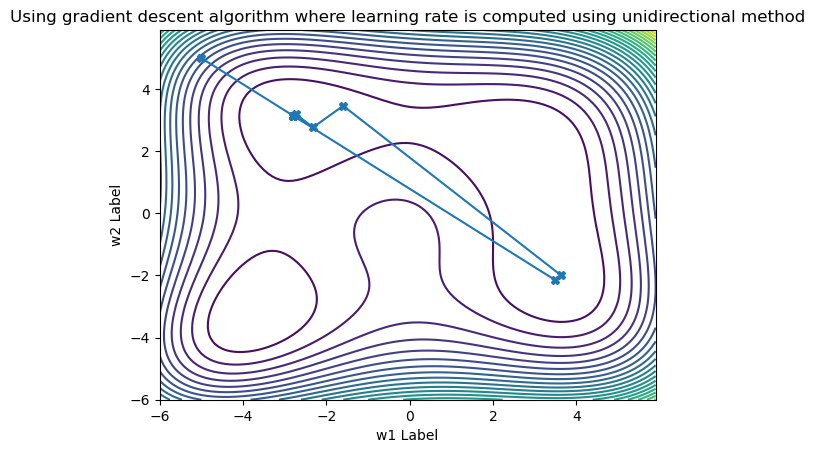

In [5]:
starting_point = np.array([-5, 5])
optimal_point , iteration_point = Gradient_descent(starting_point)
print(f'The optimal point is {optimal_point}')
print(f'The iteration points are:')
print(iteration_point)

w1 = np.arange(-6, 6, 0.1)
w2 = np.arange(-6, 6, 0.1)
W1, W2 = np.meshgrid(w1, w2)  #Forming MeshGrid

J = ((W1**2) + W2 - 11)**2 + (W1 + (W2**2) - 7)**2

fig, ax = plt.subplots(1, 1) 
ax.contour(W1, W2, J, 30)
ax.plot(iteration_point[:, 0], iteration_point[:, 1], "X-")
ax.set_xlabel('w1 Label')
ax.set_ylabel('w2 Label')
ax.set_title('Using gradient descent algorithm where learning rate is computed using unidirectional method')
plt.show()

The optimal point is [-2.80511713  3.13131244]
The iteration points are:
[[-5.          5.        ]
 [-1.46        2.02      ]
 [-1.77235456  2.51083968]
 [-2.10213018  2.86567205]
 [-2.39673732  3.04200368]
 [-2.60609947  3.1036709 ]
 [-2.7217782   3.12245095]
 [-2.77344863  3.12835303]
 [-2.79363926  3.13030085]
 [-2.80103676  3.13096232]
 [-2.80367733  3.13119045]
 [-2.8046108   3.1312698 ]
 [-2.80493963  3.13129754]
 [-2.80505533  3.13130726]
 [-2.80509602  3.13131067]
 [-2.80511033  3.13131187]
 [-2.80511536  3.13131229]
 [-2.80511713  3.13131244]]


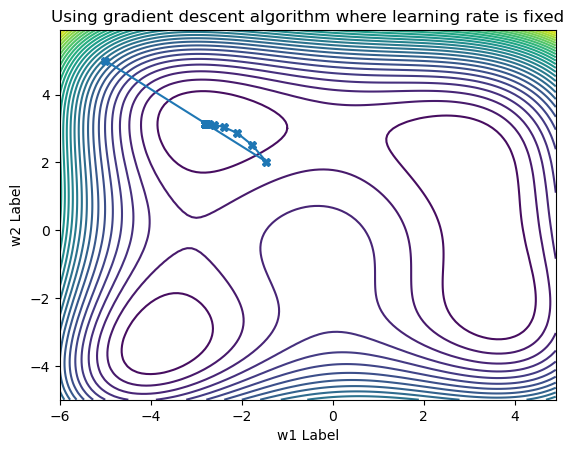

In [6]:
starting_point = np.array([-5, 5])
optimal_point , iteration_point = Gradient_descent_alpha(starting_point)
print(f'The optimal point is {optimal_point}')
print(f'The iteration points are:')
print(iteration_point)

w1 = np.arange(-6, 5, 0.1)
w2 = np.arange(-5, 6, 0.1)
W1, W2 = np.meshgrid(w1, w2)  #Forming MeshGrid

J = ((W1**2) + W2 - 11)**2 + (W1 + (W2**2) - 7)**2

fig, ax = plt.subplots(1, 1) 
ax.contour(W1, W2, J, 30)
ax.plot(iteration_point[:, 0], iteration_point[:, 1], "X-")
ax.set_xlabel('w1 Label')
ax.set_ylabel('w2 Label')
ax.set_title('Using gradient descent algorithm where learning rate is fixed')
plt.show()

The optimal point is [ 3.5844292  -1.84812629]
The iteration points are:
[[ 0.         -1.        ]
 [ 3.51445313 -1.        ]
 [ 3.5169116  -1.83215642]
 [ 3.58305208 -1.83214238]
 [ 3.58420307 -1.84810562]
 [ 3.58442528 -1.84809661]
 [ 3.5844292  -1.84812629]]


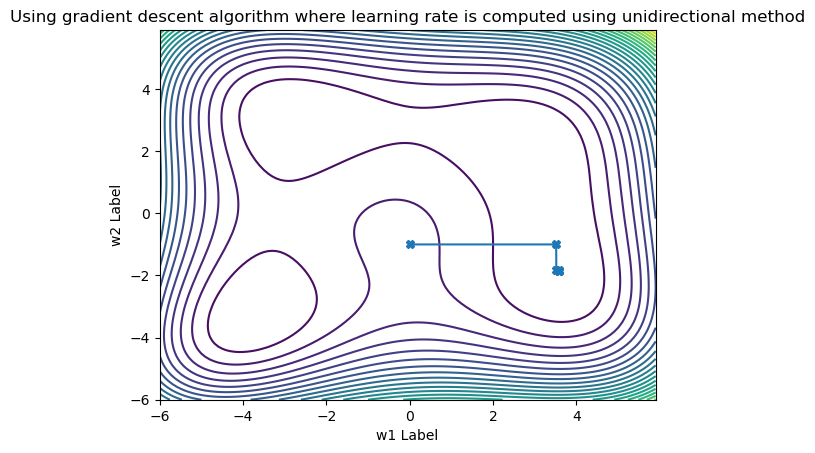

In [7]:
starting_point = np.array([0, -1])
optimal_point , iteration_point = Gradient_descent(starting_point)
print(f'The optimal point is {optimal_point}')
print(f'The iteration points are:')
print(iteration_point)

w1 = np.arange(-6, 6, 0.1)
w2 = np.arange(-6, 6, 0.1)
W1, W2 = np.meshgrid(w1, w2)  #Forming MeshGrid

J = ((W1**2) + W2 - 11)**2 + (W1 + (W2**2) - 7)**2

fig, ax = plt.subplots(1, 1) 
ax.contour(W1, W2, J, 30)
ax.plot(iteration_point[:, 0], iteration_point[:, 1], "X-")
ax.set_xlabel('w1 Label')
ax.set_ylabel('w2 Label')
ax.set_title('Using gradient descent algorithm where learning rate is computed using unidirectional method')
plt.show()

The optimal point is [ 3.58442803 -1.84812314]
The iteration points are:
[[ 0.         -1.        ]
 [ 0.12       -1.        ]
 [ 0.29513088 -0.995488  ]
 [ 0.54998963 -0.98484396]
 [ 0.91659846 -0.9670783 ]
 [ 1.42751859 -0.94368678]
 [ 2.08679029 -0.9223005 ]
 [ 2.79972206 -0.92082484]
 [ 3.32395056 -0.96265465]
 [ 3.50046208 -1.05024131]
 [ 3.51996987 -1.15497862]
 [ 3.52977378 -1.25882869]
 [ 3.53918016 -1.35778289]
 [ 3.54773989 -1.44897788]
 [ 3.55528456 -1.53013013]
 [ 3.56172129 -1.59986337]
 [ 3.56704397 -1.65781629]
 [ 3.57132094 -1.70453374]
 [ 3.57467181 -1.7412052 ]
 [ 3.57724146 -1.76935551]
 [ 3.57917777 -1.79057748]
 [ 3.58061668 -1.80635042]
 [ 3.58167451 -1.81794615]
 [ 3.58244587 -1.82640108]
 [ 3.58300492 -1.83252837]
 [ 3.58340828 -1.83694895]
 [ 3.58369835 -1.8401278 ]
 [ 3.58390647 -1.8424083 ]
 [ 3.58405552 -1.84404154]
 [ 3.58416214 -1.8452098 ]
 [ 3.58423834 -1.84604471]
 [ 3.58429276 -1.84664102]
 [ 3.58433161 -1.84706673]
 [ 3.58435934 -1.84737054]
 [ 3.5843

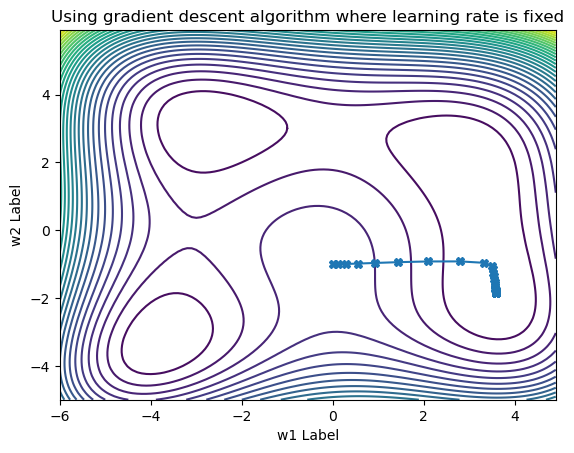

In [8]:
starting_point = np.array([0, -1])
optimal_point , iteration_point = Gradient_descent_alpha(starting_point)
print(f'The optimal point is {optimal_point}')
print(f'The iteration points are:')
print(iteration_point)

w1 = np.arange(-6, 5, 0.1)
w2 = np.arange(-5, 6, 0.1)
W1, W2 = np.meshgrid(w1, w2)  #Forming MeshGrid

J = ((W1**2) + W2 - 11)**2 + (W1 + (W2**2) - 7)**2

fig, ax = plt.subplots(1, 1) 
ax.contour(W1, W2, J, 30)
ax.plot(iteration_point[:, 0], iteration_point[:, 1], "X-")
ax.set_xlabel('w1 Label')
ax.set_ylabel('w2 Label')
ax.set_title('Using gradient descent algorithm where learning rate is fixed')
plt.show()